<a href="https://colab.research.google.com/github/Erickpython/kodeCamp_5X-MachineLearning/blob/main/Word_Prediction_with_LSTM_1_(explainer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction of the next word in a sentence.

In NLP (Natural Language Processing), words have to be converted to numeric representations that can be used to train neural networks. These representations are called embeddings.

Word2Vec is a shallow neural network that learns vector representations

```
king - man + woman ≈ queen
Paris - France + Italy ≈ Rome
```

In [ ]:
!pip install gensim nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

## **List of sentences (training data)**

In [ ]:
sentences = [
    "This movie was fantastic I loved it",
    "Absolutely terrible film waste of time",
    "Great acting and amazing story",
    "Worst movie ever"
]

In [ ]:
word_tokenize("My name is John".lower())

['my', 'name', 'is', 'john']

## **Tokenize the sentences**

In [ ]:
tokenized_sentences = [word_tokenize(s) for s in sentences]
tokenized_sentences

[['This', 'movie', 'was', 'fantastic', 'I', 'loved', 'it'],
 ['Absolutely', 'terrible', 'film', 'waste', 'of', 'time'],
 ['Great', 'acting', 'and', 'amazing', 'story'],
 ['Worst', 'movie', 'ever']]

## **Train Word2Vec on your tokenized sentences**

In [ ]:
from gensim.models import Word2Vec

embed_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,
    window=10,     # context window
    min_count=1,
    workers=4,
    sg=0          # 1 = skip-gram, 0 = CBOW
)

In [ ]:
vector = embed_model.wv["film"]
vector.shape

(100,)

In [ ]:
vector

array([ 9.7713815e-03,  8.1650866e-03,  1.2822484e-03,  5.0976737e-03,
        1.4080183e-03, -6.4550582e-03, -1.4272369e-03,  6.4490428e-03,
       -4.6172938e-03, -3.9938828e-03,  4.9246112e-03,  2.7128269e-03,
       -1.8478936e-03, -2.8774140e-03,  6.0104216e-03, -5.7167322e-03,
       -3.2365534e-03, -6.4878543e-03, -4.2353040e-03, -8.5815685e-03,
       -4.4696303e-03, -8.5106837e-03,  1.4042297e-03, -8.6187525e-03,
       -9.9181794e-03, -8.2008438e-03, -6.7725107e-03,  6.6805184e-03,
        3.7843655e-03,  3.5685423e-04, -2.9591282e-03, -7.4284747e-03,
        5.3309766e-04,  4.9873244e-04,  1.9562202e-04,  8.5238565e-04,
        7.8635261e-04, -6.8398338e-05, -8.0079054e-03, -5.8701332e-03,
       -8.3819833e-03, -1.3126077e-03,  1.8206724e-03,  7.4176090e-03,
       -1.9625046e-03, -2.3256547e-03,  9.4866101e-03,  7.9236321e-05,
       -2.4038923e-03,  8.6048432e-03,  2.6862868e-03, -5.3444644e-03,
        6.5893047e-03,  4.5092278e-03, -7.0551476e-03, -3.2220042e-04,
      

In [ ]:
embed_model.wv.most_similar("fantastic")

[('it', 0.24666626751422882),
 ('was', 0.1193675547838211),
 ('Great', 0.11928683519363403),
 ('Absolutely', 0.11659642308950424),
 ('waste', 0.09613814949989319),
 ('ever', 0.08546864986419678),
 ('and', 0.07170987874269485),
 ('film', 0.0597204864025116),
 ('story', 0.04114751145243645),
 ('time', 0.012430463917553425)]

### Build and Embedding Matrix

The neural network needs a matrix with the below shape
```
[vocab_size, embedding_dim]
```

Start with a word index, then build the embedding matrix

In [ ]:
word_index = {word: i+1 for i, word in enumerate(embed_model.wv.index_to_key)}
word_index

{'movie': 1,
 'ever': 2,
 'Worst': 3,
 'story': 4,
 'amazing': 5,
 'and': 6,
 'acting': 7,
 'Great': 8,
 'time': 9,
 'of': 10,
 'waste': 11,
 'film': 12,
 'terrible': 13,
 'Absolutely': 14,
 'it': 15,
 'loved': 16,
 'I': 17,
 'fantastic': 18,
 'was': 19,
 'This': 20}

In [ ]:
import numpy as np

embedding_dim = embed_model.vector_size
vocab_size = len(word_index) + 1  # Reserve position 0 for padding.

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    embedding_matrix[i] = embed_model.wv[word]

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00053623,  0.00023643,  0.00510335, ..., -0.00704156,
         0.00090146,  0.00639253],
       [-0.00862054,  0.00366617,  0.00519021, ..., -0.00239202,
        -0.00950903,  0.00450503],
       ...,
       [ 0.00180023,  0.00704609,  0.0029447 , ..., -0.00185955,
         0.00361175, -0.00703643],
       [ 0.00973555, -0.00978038, -0.00649949, ..., -0.00270122,
         0.00382477,  0.00033762],
       [ 0.00562671,  0.00549737,  0.00182912, ...,  0.00731327,
         0.00546557,  0.00924946]])

Create a pytorch embedding layer from the embedding matrix

In [ ]:
import torch
import torch.nn as nn

embedding_layer = nn.Embedding.from_pretrained(
    torch.tensor(embedding_matrix).float(),
    padding_idx=0,
    freeze=False    # allow fine-tuning
)

## **Create the LSTM to predict the next word**

In [ ]:
class NextWordPredictor(nn.Module):
    def __init__(self, embedding_matrix):
        super(NextWordPredictor, self).__init__()

        vocab_size, embedding_dim = embedding_matrix.shape

        self.embedding = nn.Embedding.from_pretrained(
            torch.tensor(embedding_matrix).float(),
            padding_idx=0,
            freeze=False
        )

        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=128,
            batch_first=True
        )

        self.fc = nn.Linear(128, vocab_size)


    def forward(self, x):
        x = self.embedding(x)
        output, (hidden, cell) = self.lstm(x)
        output = self.fc(output[:, -1, :])
        return output

In [ ]:
logits = np.random.rand(vocab_size - 1)
logits

array([0.46206223, 0.00217245, 0.1001692 , 0.27548785, 0.60084637,
       0.83583807, 0.38206328, 0.63799954, 0.82018536, 0.9138031 ,
       0.23410954, 0.17056445, 0.8463818 , 0.90280359, 0.17622886,
       0.01577037, 0.37164266, 0.37462998, 0.817387  , 0.21582415])

([<matplotlib.axis.XTick at 0x7b4bd8545310>,
 [Text(0, 0, 'movie'),
  Text(1, 0, 'ever'),
  Text(2, 0, 'Worst'),
  Text(3, 0, 'story'),
  Text(4, 0, 'amazing'),
  Text(5, 0, 'and'),
  Text(6, 0, 'acting'),
  Text(7, 0, 'Great'),
  Text(8, 0, 'time'),
  Text(9, 0, 'of'),
  Text(10, 0, 'waste'),
  Text(11, 0, 'film'),
  Text(12, 0, 'terrible'),
  Text(13, 0, 'Absolutely'),
  Text(14, 0, 'it'),
  Text(15, 0, 'loved'),
  Text(16, 0, 'I'),
  Text(17, 0, 'fantastic'),
  Text(18, 0, 'was'),
  Text(19, 0, 'This')])

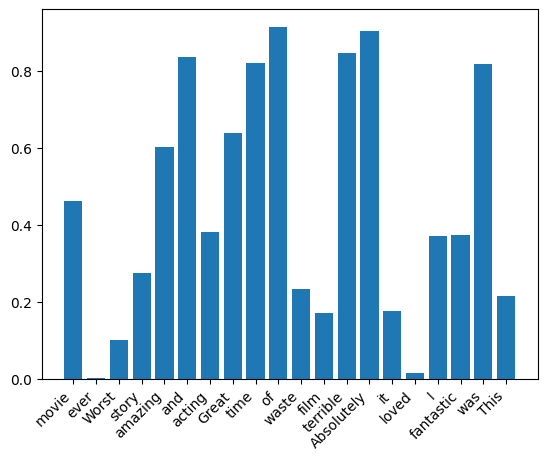

In [ ]:
# Plot a probability distribution of the outputs
import matplotlib.pyplot as plt
plt.bar(word_index.keys(), logits)
plt.xticks(list(range(len(word_index))), word_index.keys(), rotation=45, ha='right')

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2026-02-16 20:02:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2026-02-16 20:02:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2026-02-16 20:02:25--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

In [ ]:
sentences

['This movie was fantastic I loved it',
 'Absolutely terrible film waste of time',
 'Great acting and amazing story',
 'Worst movie ever']

In [ ]:
input = [
    [word_index[word] for word in sentence]
    for sentence in tokenized_sentences
]
input

[[20, 1, 19, 18, 17, 16, 15],
 [14, 13, 12, 11, 10, 9],
 [8, 7, 6, 5, 4],
 [3, 1, 2]]

In [ ]:
torch.IntTensor(input[0])

tensor([20,  1, 19, 18, 17, 16, 15], dtype=torch.int32)

In [ ]:
sentences

['This movie was fantastic I loved it',
 'Absolutely terrible film waste of time',
 'Great acting and amazing story',
 'Worst movie ever']

In [ ]:
print(word_index)

{'movie': 1, 'ever': 2, 'Worst': 3, 'story': 4, 'amazing': 5, 'and': 6, 'acting': 7, 'Great': 8, 'time': 9, 'of': 10, 'waste': 11, 'film': 12, 'terrible': 13, 'Absolutely': 14, 'it': 15, 'loved': 16, 'I': 17, 'fantastic': 18, 'was': 19, 'This': 20}


In [ ]:
embeddings = embedding_layer(torch.IntTensor(input[0]))
embeddings

tensor([[ 5.6267e-03,  5.4974e-03,  1.8291e-03,  5.7494e-03, -8.9681e-03,
          6.5594e-03,  9.2260e-03, -4.2071e-03,  1.6076e-03, -5.2339e-03,
          1.0582e-03,  2.7702e-03,  8.1607e-03,  5.4401e-04,  2.5571e-03,
          1.2977e-03,  8.4025e-03, -5.7077e-03, -6.2618e-03, -3.6275e-03,
         -2.3005e-03,  5.0411e-03, -8.1204e-03, -2.8335e-03, -8.1974e-03,
          5.1497e-03, -2.5681e-03, -9.0671e-03,  4.0717e-03,  9.0173e-03,
         -3.0377e-03, -5.8385e-03,  3.0199e-03, -4.3585e-04, -9.9794e-03,
          8.4177e-03, -7.3389e-03, -4.9304e-03, -2.6571e-03, -5.4523e-03,
          1.7165e-03,  9.7128e-03,  4.5723e-03,  8.0886e-03, -4.7046e-04,
          6.4492e-04, -2.6684e-03, -8.7796e-03,  3.4313e-03,  2.0934e-03,
         -9.4219e-03, -4.9684e-03, -9.7341e-03, -5.7198e-03,  4.0645e-03,
          8.6429e-03,  4.1116e-03,  2.3885e-03,  8.1448e-03, -1.1192e-03,
         -1.3977e-03, -8.7468e-03, -1.2579e-04, -2.5676e-03,  3.8608e-04,
          7.2797e-03, -7.0415e-03, -3.

In [ ]:
input1 = torch.IntTensor(input[0]).reshape(-1, len(input[0]))
input1.shape

torch.Size([1, 7])

In [ ]:
model = NextWordPredictor(embedding_matrix)
y_pred = model(input1)
y_pred

tensor([[ 0.0409, -0.0394, -0.0329,  0.0644,  0.0525, -0.0303,  0.0561, -0.0536,
          0.0817,  0.0371,  0.0965, -0.0105,  0.0493,  0.0631,  0.0306, -0.0338,
         -0.0611, -0.0911, -0.0411, -0.0017,  0.0040]],
       grad_fn=<AddmmBackward0>)

([<matplotlib.axis.XTick at 0x7b4bd7c1cc20>,
 [Text(0, 0, 'movie'),
  Text(1, 0, 'ever'),
  Text(2, 0, 'Worst'),
  Text(3, 0, 'story'),
  Text(4, 0, 'amazing'),
  Text(5, 0, 'and'),
  Text(6, 0, 'acting'),
  Text(7, 0, 'Great'),
  Text(8, 0, 'time'),
  Text(9, 0, 'of'),
  Text(10, 0, 'waste'),
  Text(11, 0, 'film'),
  Text(12, 0, 'terrible'),
  Text(13, 0, 'Absolutely'),
  Text(14, 0, 'it'),
  Text(15, 0, 'loved'),
  Text(16, 0, 'I'),
  Text(17, 0, 'fantastic'),
  Text(18, 0, 'was'),
  Text(19, 0, 'This')])

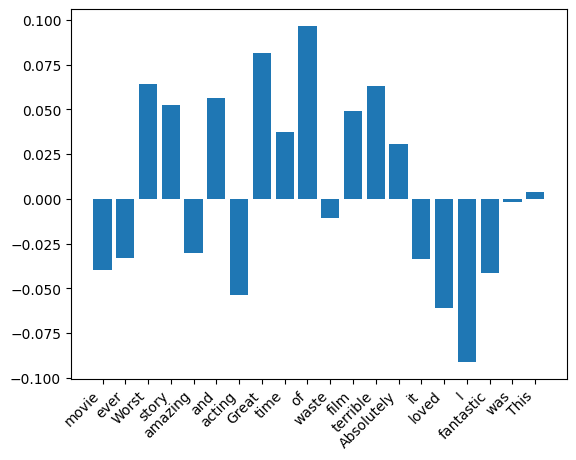

In [ ]:
plt.bar(word_index.keys(), y_pred.detach().numpy().flatten()[1:])
plt.xticks(list(range(len(word_index))), word_index.keys(), rotation=45, ha='right')

In [ ]:
tokenized_sentences

[['This', 'movie', 'was', 'fantastic', 'I', 'loved', 'it'],
 ['Absolutely', 'terrible', 'film', 'waste', 'of', 'time'],
 ['Great', 'acting', 'and', 'amazing', 'story'],
 ['Worst', 'movie', 'ever']]

In [ ]:
training_x = []
training_y = []
for i in range(len(input[0])):
    training_x.append([x for x in input[0][:i]])
    training_y.append(input[0][i])

training_x[1:], training_y[1:]

([[20],
  [20, 1],
  [20, 1, 19],
  [20, 1, 19, 18],
  [20, 1, 19, 18, 17],
  [20, 1, 19, 18, 17, 16]],
 [1, 19, 18, 17, 16, 15])

In [ ]:
# Left pad short x values
pad = [0]

for i in range(len(training_x)):
    training_x[i] = pad * (len(training_x[-1]) - len(training_x[i])) + training_x[i]

training_x[1:], training_y[1:]


([[0, 0, 0, 0, 0, 20],
  [0, 0, 0, 0, 20, 1],
  [0, 0, 0, 20, 1, 19],
  [0, 0, 20, 1, 19, 18],
  [0, 20, 1, 19, 18, 17],
  [20, 1, 19, 18, 17, 16]],
 [1, 19, 18, 17, 16, 15])

In [ ]:
nn.functional.one_hot(torch.LongTensor(training_y), num_classes=vocab_size)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [ ]:
model = NextWordPredictor(embedding_matrix)

epochs = 1000
learning_rate = 0.001
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

losses = []

In [ ]:
training_x = torch.IntTensor(training_x)
# Convert y into a one-hot encoding
training_y = nn.functional.one_hot(torch.LongTensor(training_y), num_classes=vocab_size).float()

for epoch in range(epochs):
    model.train()
    y_pred = model(training_x)
    loss = criteria(y_pred, training_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

Epoch: 0, Loss: 3.0557456016540527
Epoch: 100, Loss: 0.28361058235168457
Epoch: 200, Loss: 0.016462933272123337
Epoch: 300, Loss: 0.006828264333307743
Epoch: 400, Loss: 0.0039203595370054245
Epoch: 500, Loss: 0.002590615302324295
Epoch: 600, Loss: 0.0018527323845773935
Epoch: 700, Loss: 0.0013826683862134814
Epoch: 800, Loss: 0.001067499746568501
Epoch: 900, Loss: 0.0008594793034717441


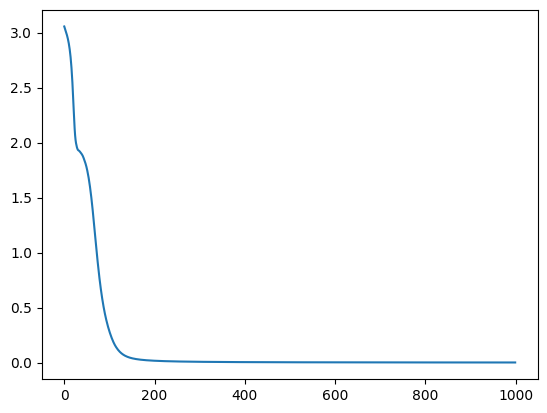

In [ ]:
plt.plot(losses)

In [ ]:
torch.IntTensor(input[0][:5]).reshape(-1, 5)

tensor([[20,  1, 19, 18, 17]], dtype=torch.int32)

In [ ]:
y_pred = model(torch.IntTensor(input[0][:5]).reshape(-1, 5))
y_pred

tensor([[-3.9677, -1.1463, -3.2452, -3.2958, -2.4068, -3.3110, -3.3756, -3.7736,
         -2.4653, -3.5518, -3.0468, -4.0809, -3.1963, -3.1511, -3.5433,  5.7182,
         11.5775,  2.9259,  0.5958, -1.8412,  2.2275]],
       grad_fn=<AddmmBackward0>)

([<matplotlib.axis.XTick at 0x7b4bd5b14c20>,
 [Text(0, 0, 'movie'),
  Text(1, 0, 'ever'),
  Text(2, 0, 'Worst'),
  Text(3, 0, 'story'),
  Text(4, 0, 'amazing'),
  Text(5, 0, 'and'),
  Text(6, 0, 'acting'),
  Text(7, 0, 'Great'),
  Text(8, 0, 'time'),
  Text(9, 0, 'of'),
  Text(10, 0, 'waste'),
  Text(11, 0, 'film'),
  Text(12, 0, 'terrible'),
  Text(13, 0, 'Absolutely'),
  Text(14, 0, 'it'),
  Text(15, 0, 'loved'),
  Text(16, 0, 'I'),
  Text(17, 0, 'fantastic'),
  Text(18, 0, 'was'),
  Text(19, 0, 'This')])

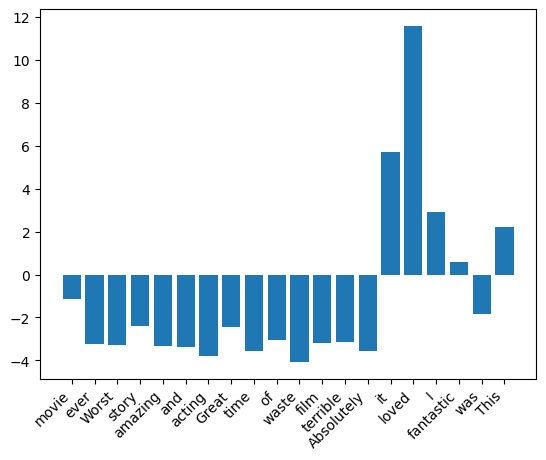

In [ ]:
plt.bar(word_index.keys(), y_pred.detach().numpy().flatten()[1:])
plt.xticks(list(range(len(word_index))), word_index.keys(), rotation=45, ha='right')

In [ ]:
sentences[0]

'This movie was fantastic I loved it'